In [ ]:
pip install pmdarima

# Import Necessary Libraries

In [ ]:
#Start by importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


from statsmodels.tsa.seasonal import seasonal_decompose
# For SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose # For time series decomposition
from pmdarima import auto_arima

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model  # Allows load a previously saved model.
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

# Load the dataset into  dataframe

In [ ]:
oilprice=pd.read_excel("oil prices.xls",index_col=0, parse_dates=True) # Load your dataset into a Pandas DataFrame

In [ ]:
oilprice #output

,price
date,
2020-01-01,67.79
2020-01-02,67.05
2020-01-03,69.08
2020-01-06,70.25
2020-01-07,68.74
...,...
2023-11-24,79.82
2023-11-27,79.49
2023-11-28,81.66


 # Sense of your Data using functions 'head','info','describe','shape','null values'



In [ ]:
# Display the first few rows of the dataset
print(oilprice.head())

            price
date             
2020-01-01  67.79
2020-01-02  67.05
2020-01-03  69.08
2020-01-06  70.25
2020-01-07  68.74


In [ ]:
# Display the last few rows of the dataset
print(oilprice.tail())

            price
date             
2023-11-24  79.82
2023-11-27  79.49
2023-11-28  81.66
2023-11-29  82.98
2023-11-30  81.72


In [ ]:
# Get summary statistics
print(oilprice.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1022 entries, 2020-01-01 to 2023-11-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1022 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB
None


In [ ]:
print(oilprice.describe())

             price
count  1022.000000
mean     73.852055
std      24.082283
min       9.120000
25%      57.355000
50%      76.425000
75%      88.302500
max     133.180000


In [ ]:
print(oilprice.shape)

(1022, 1)


In [ ]:
print(oilprice.isnull().sum())

price    0
dtype: int64


In [ ]:
oilprice["price"].unique()

array([ 67.79,  67.05,  69.08,  70.25,  68.74,  67.31,  66.58,  66.77,
        64.14,  64.45,  63.29,  64.63,  64.05,  63.66,  62.11,  61.26,
        59.34,  58.54,  59.37,  59.46,  57.72,  57.77,  54.  ,  53.9 ,
        55.36,  55.18,  54.53,  53.39,  55.54,  56.34,  57.37,  57.83,
        57.35,  59.72,  59.57,  58.6 ,  56.71,  55.29,  54.96,  52.19,
        51.31,  52.52,  52.24,  51.86,  51.29,  45.6 ,  35.33,  35.57,
        34.45,  31.02,  32.25,  27.98,  27.97,  22.79,  23.98,  25.55,
        23.75,  24.5 ,  25.62,  23.55,  22.39,  19.19,  14.85,  14.97,
        20.24,  24.33,  22.58,  22.1 ,  25.22,  20.23,  20.54,  21.56,
        21.74,  19.8 ,  18.69,  19.75,  17.36,   9.12,  13.77,  15.06,
        15.87,  15.17,  15.6 ,  17.86,  18.11,  18.49,  20.4 ,  25.46,
        24.2 ,  24.23,  24.78,  25.53,  26.67,  27.89,  29.87,  30.95,
        33.3 ,  33.06,  34.76,  34.78,  33.8 ,  33.85,  33.95,  32.73,
        33.98,  34.15,  36.74,  37.72,  37.98,  38.41,  41.  ,  39.66,
      

In [ ]:
oilprice["price"].value_counts()

83.40    3
83.43    3
73.38    3
50.88    3
88.00    2
        ..
66.13    1
65.98    1
66.54    1
65.34    1
81.72    1
Name: price, Length: 959, dtype: int64

In [ ]:
oilprice.corr()

,price
price,1.0


# Visualize Distrubutions


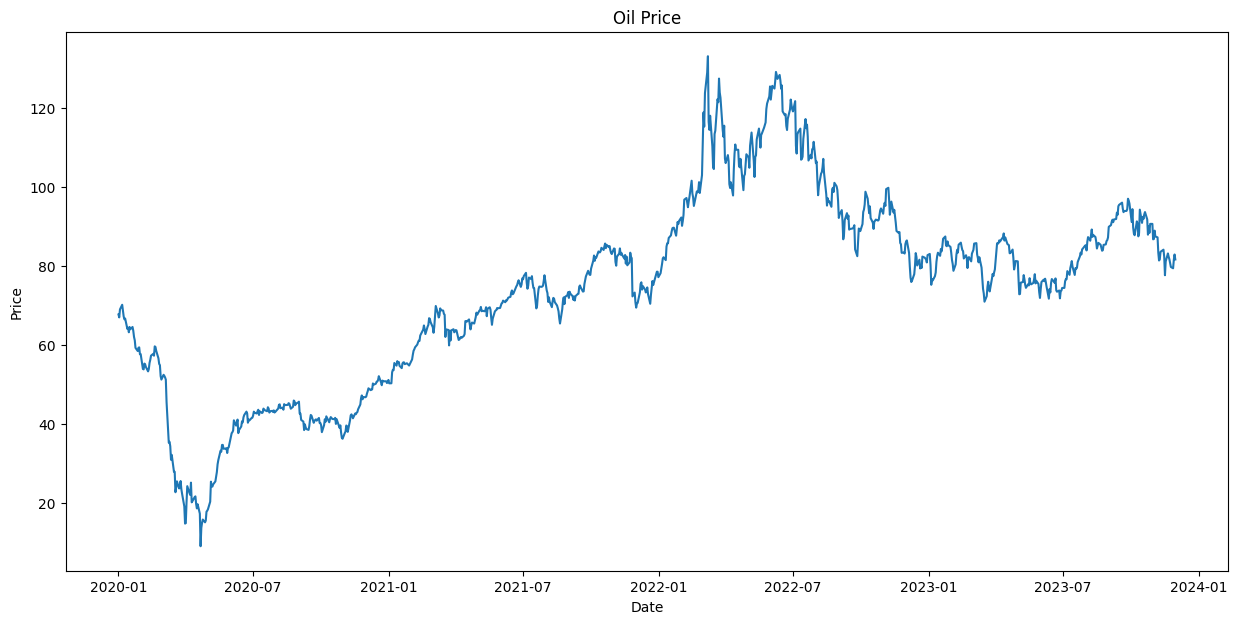

In [ ]:
#line plot

plt.figure(figsize=(15,7))
plt.plot(oilprice['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil Price')
plt.show()


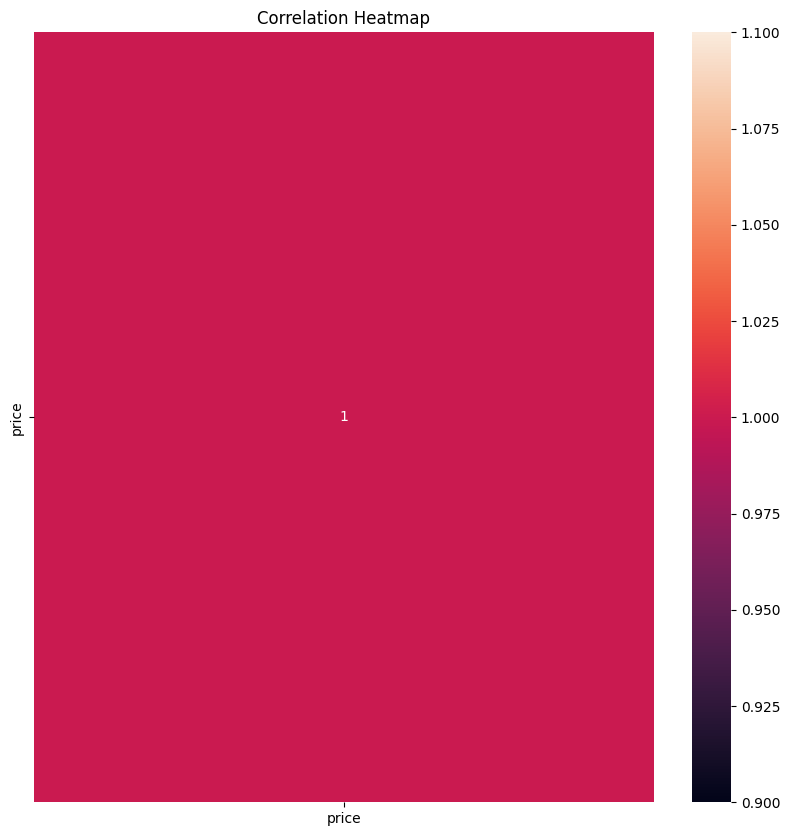

In [ ]:
#heat map

oilprice.corr()
plt.figure(figsize=(10,10))
sns.heatmap(oilprice.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1000x1000 with 0 Axes>

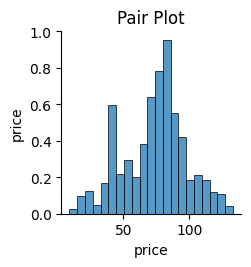

In [ ]:
#pair plot

plt.figure(figsize=(10,10))
sns.pairplot(oilprice)
plt.title('Pair Plot')
plt.show()


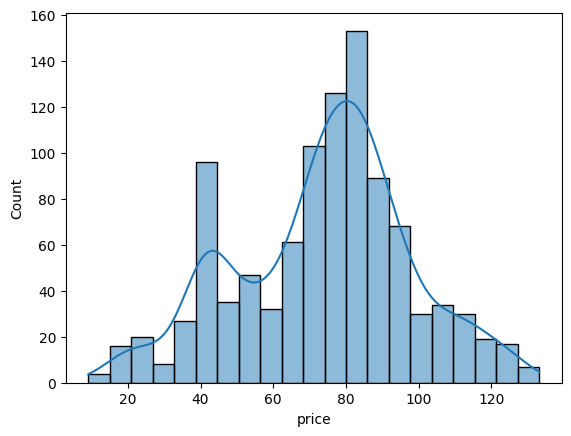

In [ ]:
# Histogram
sns.histplot(oilprice['price'], kde=True)
plt.show()


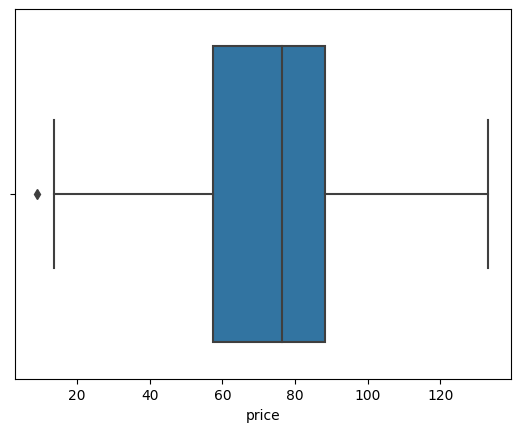

In [ ]:
# Boxplot
sns.boxplot(x='price', data=oilprice)
plt.show()

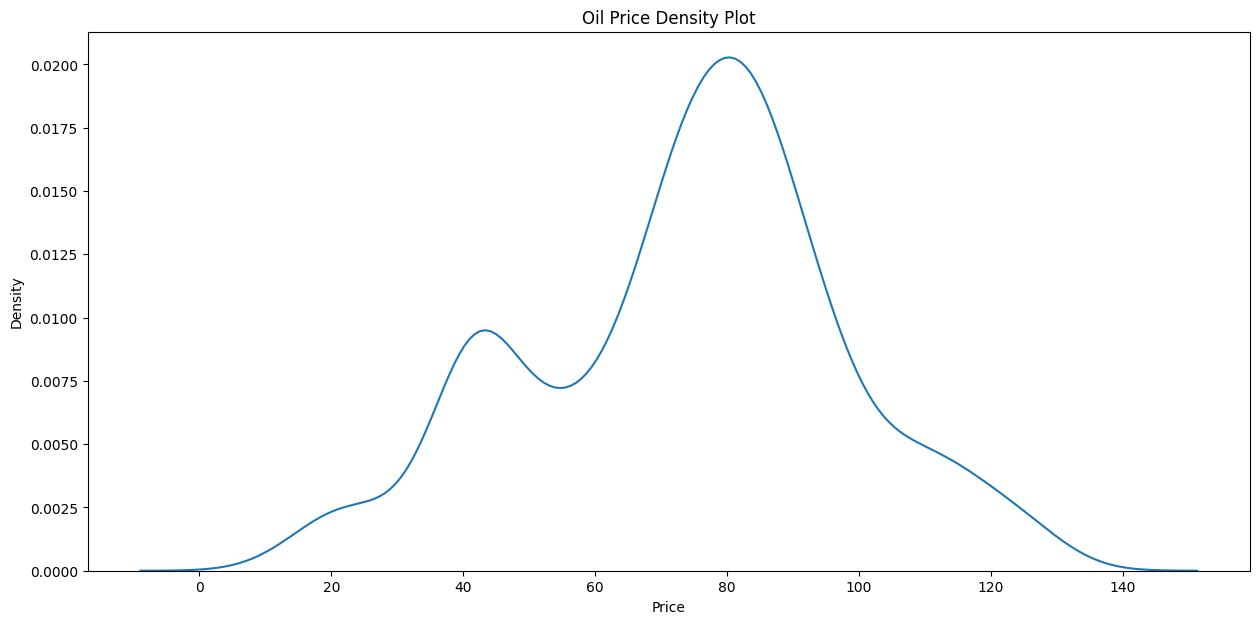

In [ ]:
#density plot

plt.figure(figsize=(15,7))
sns.kdeplot(oilprice['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Oil Price Density Plot')
plt.show()


<ipython-input-20-ca5ed40d25ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oilprice['price'])


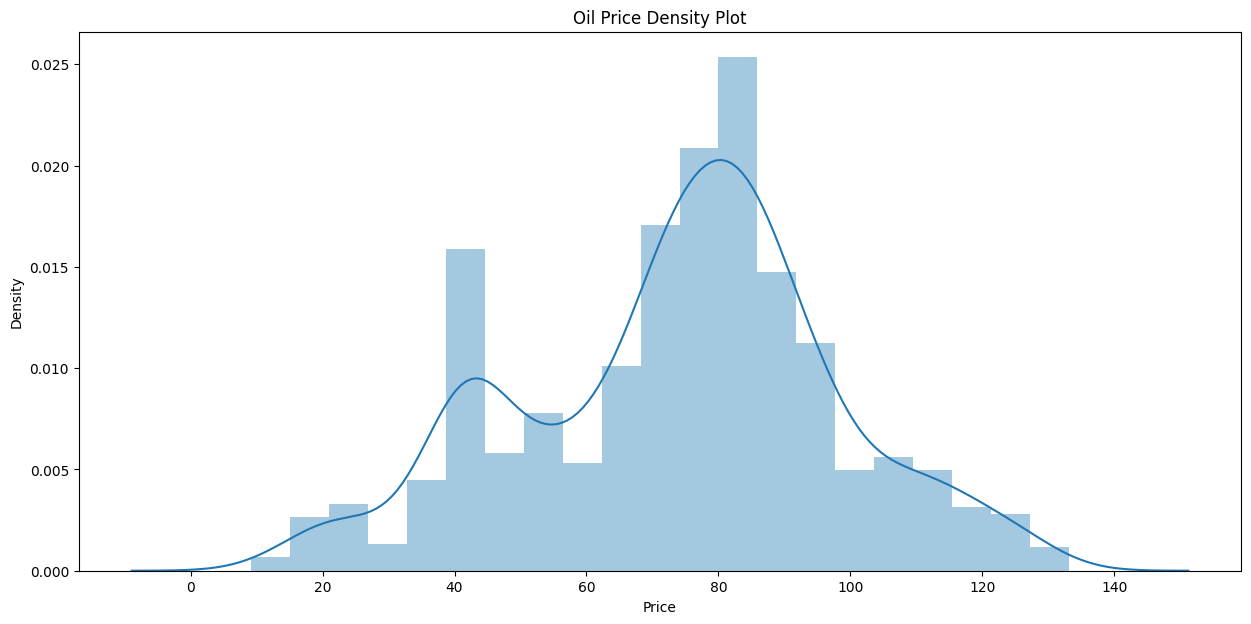

In [ ]:
#dist plot
plt.figure(figsize=(15,7))
sns.distplot(oilprice['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Oil Price Density Plot')
plt.show()


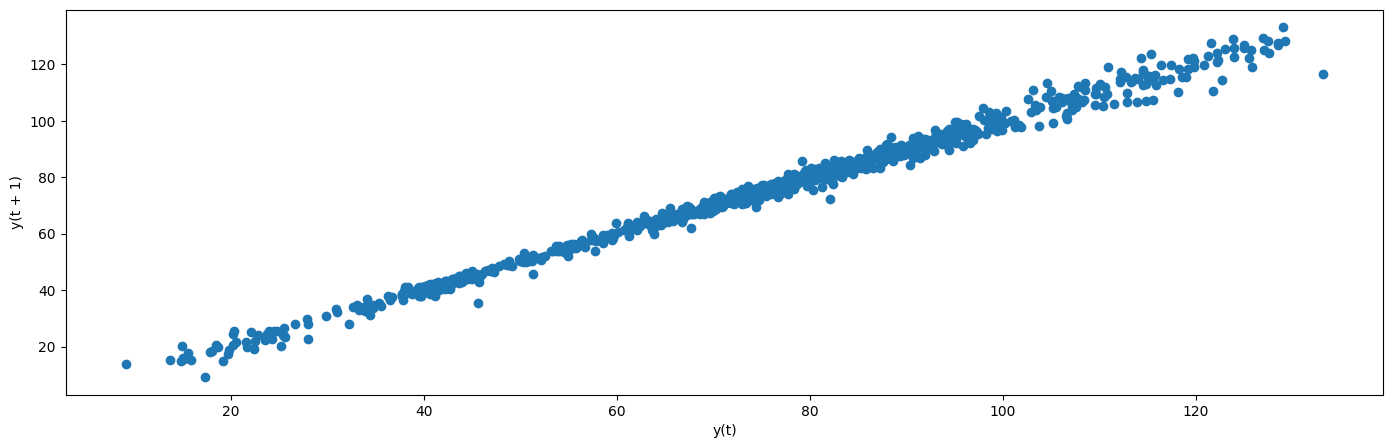

In [ ]:
#lag plot using scatter plot

plt.figure(figsize = (17,5))
pd.plotting.lag_plot(oilprice)
plt.show()


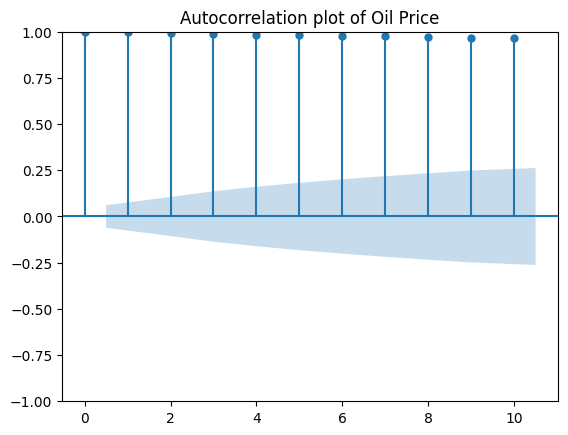

In [ ]:
#acf plot

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(oilprice['price'], lags=10)
plt.title('Autocorrelation plot of Oil Price')
plt.show()


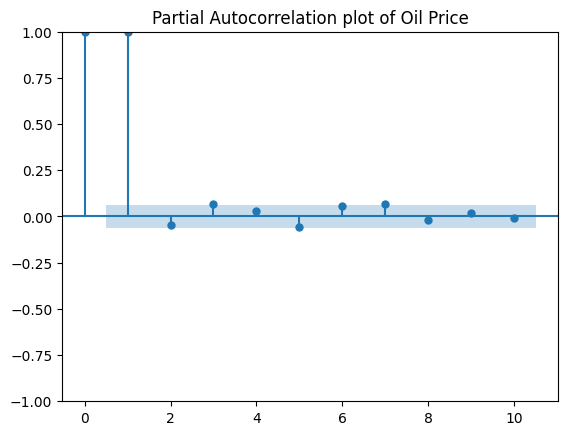

In [ ]:
#pacf plot

sm.graphics.tsa.plot_pacf(oilprice['price'], lags=10)
plt.title('Partial Autocorrelation plot of Oil Price')
plt.show()


<Figure size 640x480 with 0 Axes>

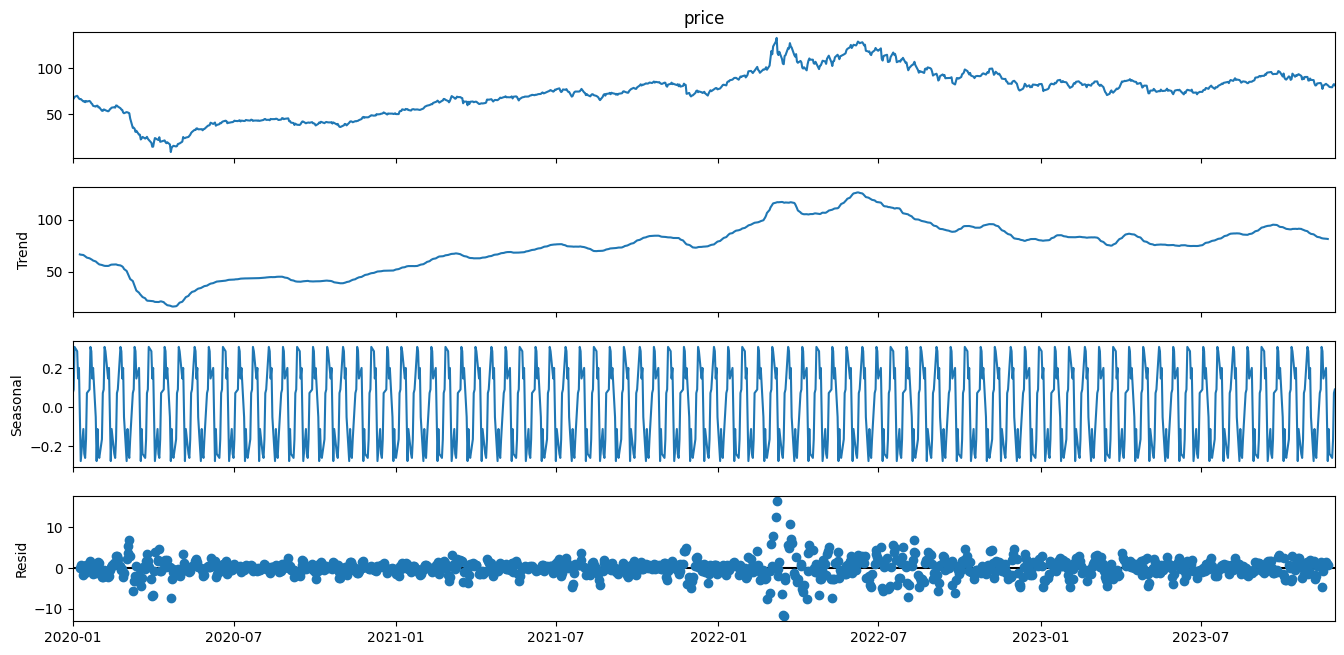

In [ ]:
#seasonal decompose

decomposition = seasonal_decompose(oilprice['price'], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


In [ ]:
# stationarity using KPSS test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(oilprice,nlags='auto')
print('kpss Statistic: ', kpss_test[0])
print('p-value: ', kpss_test[1])
print("Critical Values:")
if kpss_test[1] < 0.05:
    print('The data is stationary.')
else:
    print('The data is not stationary.')

kpss Statistic:  3.2319268151828324
p-value:  0.01
Critical Values:
The data is stationary.


<ipython-input-26-41a7ad7b87b0>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(oilprice,nlags='auto')


#Split the data


In [ ]:
train = oilprice[:int(len(oilprice)*0.7)]
test = oilprice[int(len(oilprice)*0.7):]

In [ ]:
train

,price
date,
2020-01-01,67.79
2020-01-02,67.05
2020-01-03,69.08
2020-01-06,70.25
2020-01-07,68.74
...,...
2022-09-21,89.86
2022-09-22,90.40
2022-09-23,84.29


In [ ]:
test

,price
date,
2022-09-28,89.55
2022-09-29,89.41
2022-09-30,88.90
2022-10-03,90.68
2022-10-04,93.74
...,...
2023-11-24,79.82
2023-11-27,79.49
2023-11-28,81.66


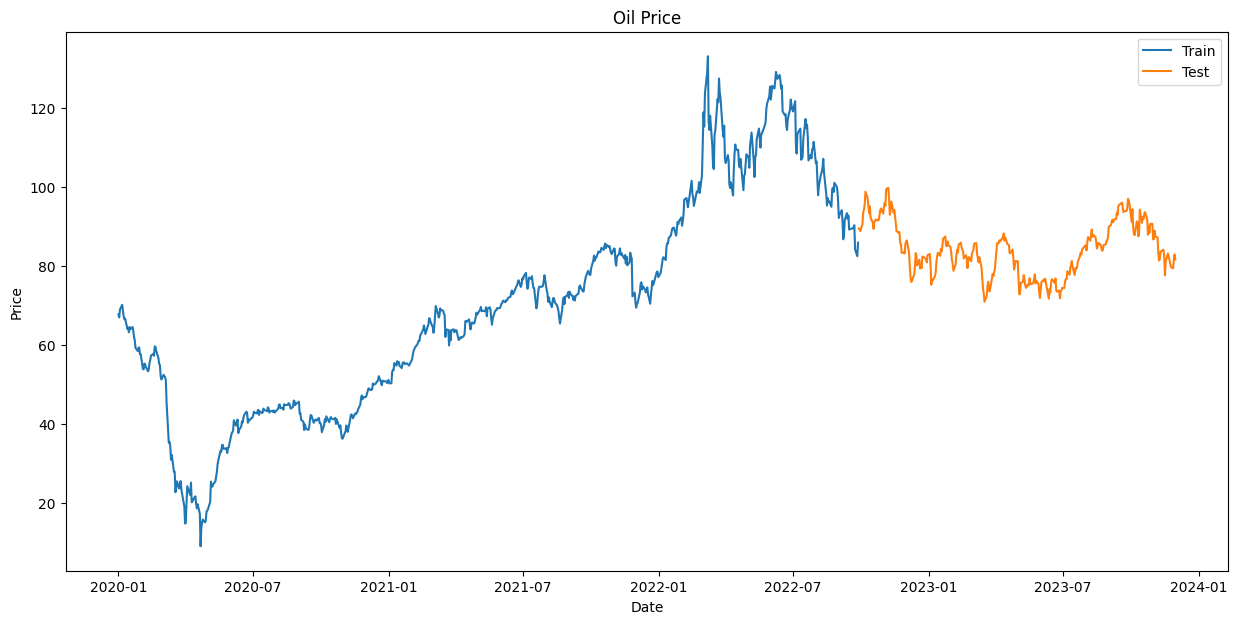

In [ ]:
#visualization for train, test

plt.figure(figsize=(15,7))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil Price')
plt.legend()
plt.show()


# Checking for best model

### LSTM Model

In [ ]:
# LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam


def build_lstm_model():
    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model


model = build_lstm_model()

# Train the model
model.fit(train, train['price'], epochs=100, batch_size=32)

# Evaluate the model
test_predictions = model.predict(test)

# Calculate the mean squared error
mse = mean_squared_error(test['price'], test_predictions)

# Print the mean squared error
print('Mean Squared Error:', mse)


Epoch 1/100
23/23 [==============================] - 5s 6ms/step - loss: 5468.8047
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 5155.2944
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 4604.7148
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 4119.0522
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 3844.3010
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 3663.2522
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 3511.8562
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 3367.1035
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 3237.2175
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 3126.1931
Epoch 11/100
23/23 [==============================] - 0s 5ms/step - loss: 3022.2029
Epoch 12/100
23/23 [==============================] - 0s 6ms/step - loss: 2898.8169
E

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['price'], test_predictions))
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 8.100233886249997


### Holts winter exponential smoothing with additive seasonality and additive trend

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


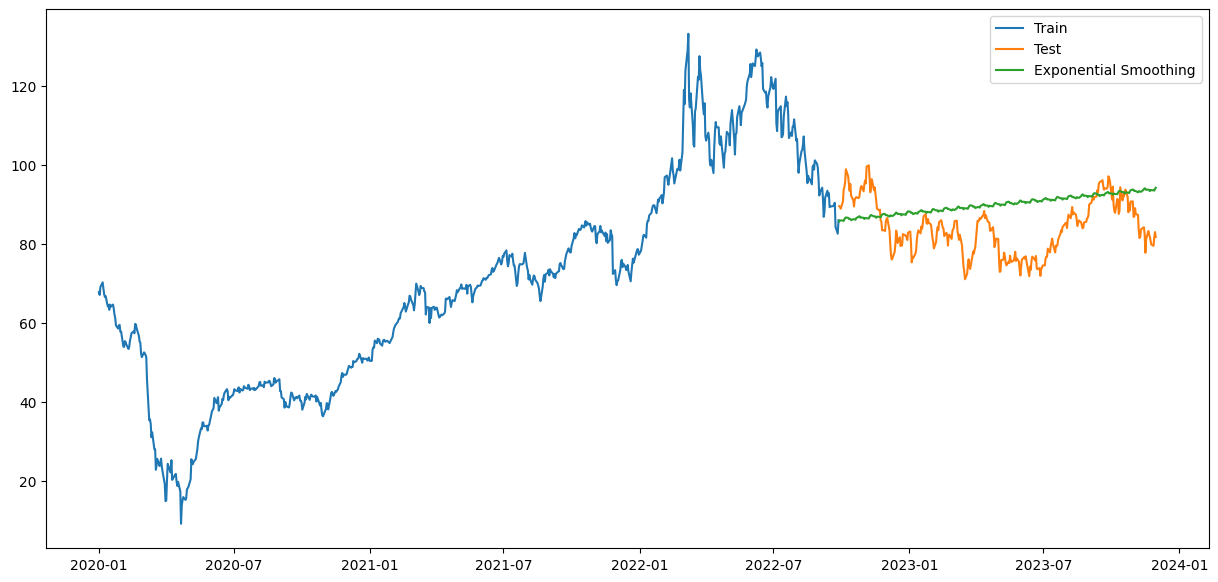

The root mean squared error is:  9.192169939702206


In [ ]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train['price'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
yhat = model_fit.forecast(307)
plt.figure(figsize=(15,7))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(yhat, label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()
# prompt: check for rmse value

rmse=np.sqrt(mean_squared_error(test['price'],yhat))
print("The root mean squared error is: ",rmse)

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


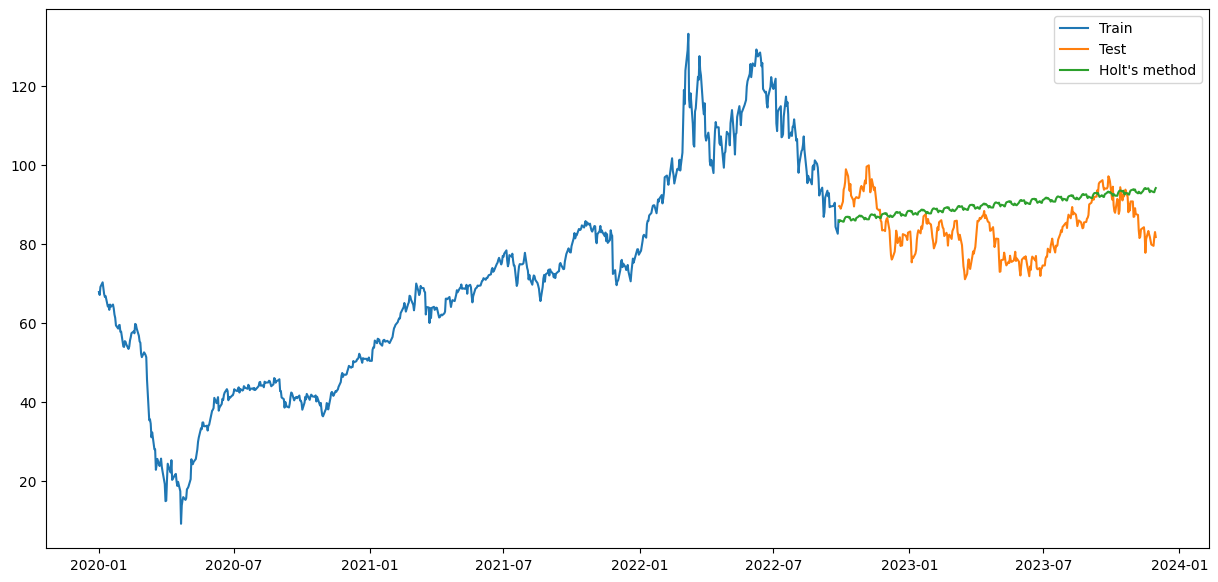

The root mean squared error is:  9.162756385924649


In [ ]:
# Holt's method
model = ExponentialSmoothing(train['price'], trend='add', seasonal='mul', seasonal_periods=12)
model_fit = model.fit()
yhat = model_fit.forecast(307)
plt.figure(figsize=(15,7))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(yhat, label='Holt\'s method')
plt.legend(loc='best')
plt.show()

rmse=np.sqrt(mean_squared_error(test['price'],yhat))
print("The root mean squared error is: ",rmse)


# Model Training

In [ ]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(oilprice['price'],
                          start_p=1, start_q=1, max_p=3, max_q=3,
                          m=12, start_P=0, seasonal=True, d=None, D=1, trace=True,
                          error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.46 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6741.223, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4740.940, Time=2.69 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5876.114, Time=5.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6739.881, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4968.155, Time=0.56 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4671.328, Time=13.51 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.58 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6725.780, Time=5.91 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=4669.313, Time=7.72 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=4738.037, Time=3.16 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=18.63 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AI

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1022
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2328.661
Date:                            Thu, 28 Dec 2023   AIC                           4667.322
Time:                                    14:38:28   BIC                           4691.911
Sample:                                01-01-2020   HQIC                          4676.663
                                     - 11-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0209      0.023     43.786      0.000       0.975       1.067
ar.L2         -0.0633      0.024     -2.605      0.009      -0.111      -0.016
ar.S.L12      -0.5920      0.020    -29.058      0.000      -0.632      -0.552
ar.S.L24      -0.2657      0.022    -11.830      0.000      -0.310      -0.222
sigma2         5.8522      0.148     39.674      0.000       5.563       6.141
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1043.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.44
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Fit the ARIMA model to the training data
model = ARIMA(train['price'], order=(2,0,0),seasonal_order=(2,1,0,12))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            price   No. Observations:                  715
Model:             ARIMA(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1664.298
Date:                          Thu, 28 Dec 2023   AIC                           3338.596
Time:                                  14:38:31   BIC                           3361.373
Sample:                              01-01-2020   HQIC                          3347.399
                                   - 09-27-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0144      0.028     36.770      0.000       0.960       1.069
ar.L2         -0.0525      0.029     -1.829      0.067      -0.109       0.004
ar.S.L12      -0.5956      0.024    -24.359      0.000      -0.643      -0.548
ar.S.L24      -0.2493      0.027     -9.377      0.000      -0.301      -0.197
sigma2         6.6039      0.195     33.819      0.000       6.221       6.987
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               893.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.32   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train)+len(test)-1
print(start,end)

715 1021


In [ ]:
pred_arima = model_fit.predict(start=start, end=end)
pred_arima

2022-09-28    86.896533
2022-09-29    87.885613
2022-09-30    88.856550
2022-10-03    86.643456
2022-10-04    84.770767
                ...    
2023-11-24    83.079596
2023-11-27    80.957511
2023-11-28    79.946341
2023-11-29    78.746818
2023-11-30    79.817625
Freq: B, Name: predicted_mean, Length: 307, dtype: float64

In [ ]:
# Evaluate the predictions
rmse_arima = np.sqrt(mean_squared_error(pred_arima,test['price']))
print('RMSE:', rmse_arima)

RMSE: 7.494392727133029


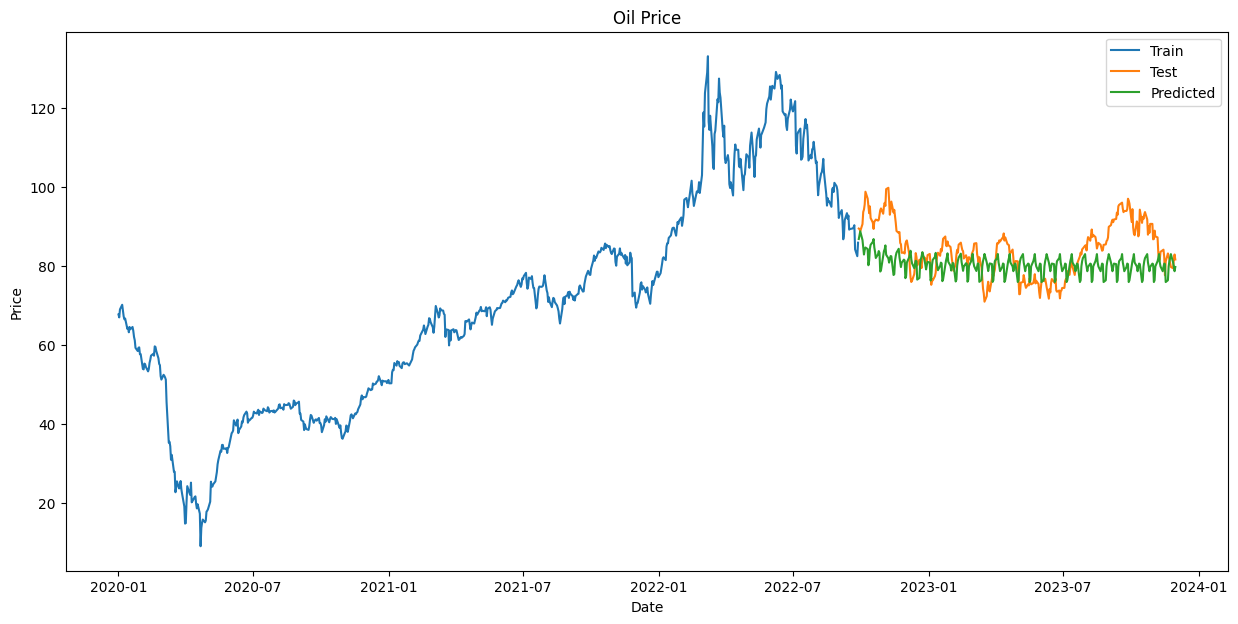

In [ ]:
#visualize test,train, predicted values

plt.figure(figsize=(15,7))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_arima, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Oil Price')
plt.legend()
plt.show()


# Save the model

In [ ]:
# prompt: save model as pickle file
model_fit.save('oilprice_model.pkl')


In [ ]:
sarima_model_forecast = SARIMAX(oilprice, order=(2,0,0), seasonal_order=(2,1,0,12))
estimator_forecast = sarima_model_forecast.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
# Makes predictions
steps_ahead = 365
forecasts = estimator_forecast.forecast(steps_ahead)
ci = estimator_forecast.conf_int()

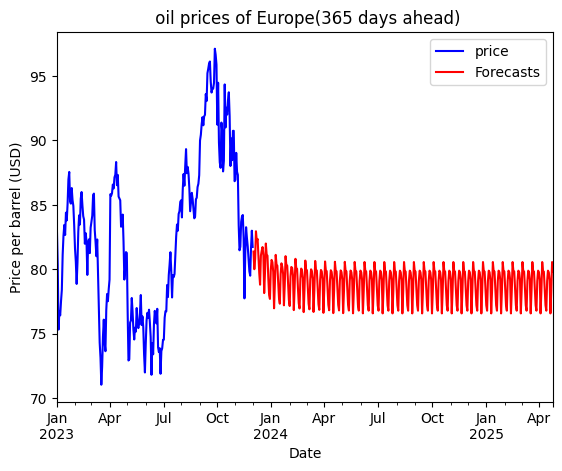

In [ ]:
# Displays the results
short_data = oilprice[oilprice.index.year >= 2023]
short_data.plot(color='blue', label='Actual')
forecasts.plot(color='red', label='Forecasts')

plt.title(' oil prices of Europe(365 days ahead)')
plt.xlabel('Date')
plt.ylabel('Price per barrel')
plt.legend()
plt.show()

In [ ]:
print('Forecasts for the following {} days: \n'.format(steps_ahead))
print(forecasts)

Forecasts for the following 365 days: 

2023-12-01    81.360066
2023-12-04    79.991922
2023-12-05    80.792850
2023-12-06    82.934688
2023-12-07    82.187412
                ...    
2025-04-18    79.171484
2025-04-21    76.562944
2025-04-22    78.287985
2025-04-23    80.548034
2025-04-24    79.823587
Freq: B, Name: predicted_mean, Length: 365, dtype: float64
